## Importar bibliotecas

In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import re
import string

## Importar dados

In [116]:
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

In [117]:
df_fake

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"
...,...,...,...,...
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016"
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016"
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016"
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016"


In [118]:
df_true

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
...,...,...,...,...
21412,'Fully committed' NATO backs new U.S. approach...,BRUSSELS (Reuters) - NATO allies on Tuesday we...,worldnews,"August 22, 2017"
21413,LexisNexis withdrew two products from Chinese ...,"LONDON (Reuters) - LexisNexis, a provider of l...",worldnews,"August 22, 2017"
21414,Minsk cultural hub becomes haven from authorities,MINSK (Reuters) - In the shadow of disused Sov...,worldnews,"August 22, 2017"
21415,Vatican upbeat on possibility of Pope Francis ...,MOSCOW (Reuters) - Vatican Secretary of State ...,worldnews,"August 22, 2017"


## Normalizar Fake and True News

In [119]:
import pandas as pd

# Adicionar uma coluna que indica se é Fake ou True
df_fake['label'] = 'Fake'
df_true['label'] = 'True'

# Manter apenas registros com datas válidas
df_fake['date'] = pd.to_datetime(df_fake['date'], errors='coerce')
df_true['date'] = pd.to_datetime(df_true['date'], errors='coerce')

# Filtrar apenas registros com datas não nulas
df_fake = df_fake.dropna(subset=['date'])
df_true = df_true.dropna(subset=['date'])

# Combinar os dois DataFrames em um único DataFrame
df_combined = pd.concat([df_fake, df_true], ignore_index=True)

# Adicionar um identificador único para cada notícia
df_combined.reset_index(inplace=True)
df_combined.rename(columns={'index': 'id'}, inplace=True)

# Criar a tabela 'articles' (id, title, text)
articles = df_combined[['id', 'title', 'text']]

# Criar a tabela 'subjects' (id, subject)
subjects = df_combined[['id', 'subject']].drop_duplicates()

# Criar a tabela 'dates' (id, date)
dates = df_combined[['id', 'date']].drop_duplicates()

# Criar a tabela 'labels' (id, label)
labels = df_combined[['id', 'label']]


In [120]:
# Salvar as tabelas em arquivos CSV
articles.to_csv('articles.csv', index=False)
subjects.to_csv('subjects.csv', index=False)
dates.to_csv('dates.csv', index=False)
labels.to_csv('labels.csv', index=False)

## Insights Gráficos

### Análise de Distribuição de Notícias por Assunto

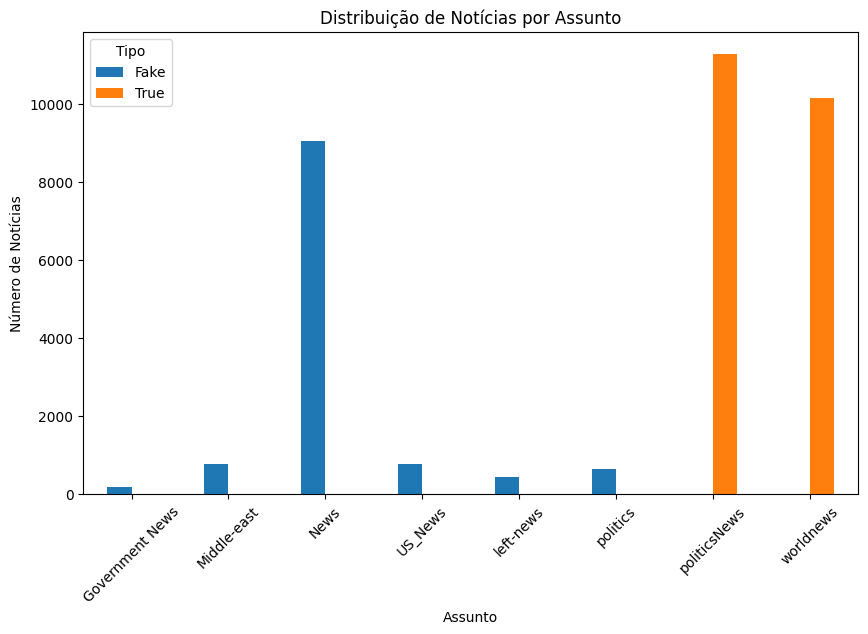

In [121]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar as tabelas
subjects = pd.read_csv('subjects.csv')
labels = pd.read_csv('labels.csv')

# Mesclar as tabelas 'subjects' e 'labels' com base no 'id'
data = pd.merge(subjects, labels, on='id')

# Contar o número de notícias por assunto e por tipo (Fake ou True)
subject_counts = data.groupby(['subject', 'label']).size().unstack()

# Criar o gráfico de barras
subject_counts.plot(kind='bar', figsize=(10, 6))
plt.title('Distribuição de Notícias por Assunto')
plt.xlabel('Assunto')
plt.ylabel('Número de Notícias')
plt.xticks(rotation=45)
plt.legend(title='Tipo')
plt.show()

### Análise Temporal

Valores únicos na coluna 'label': ['Fake' 'True']


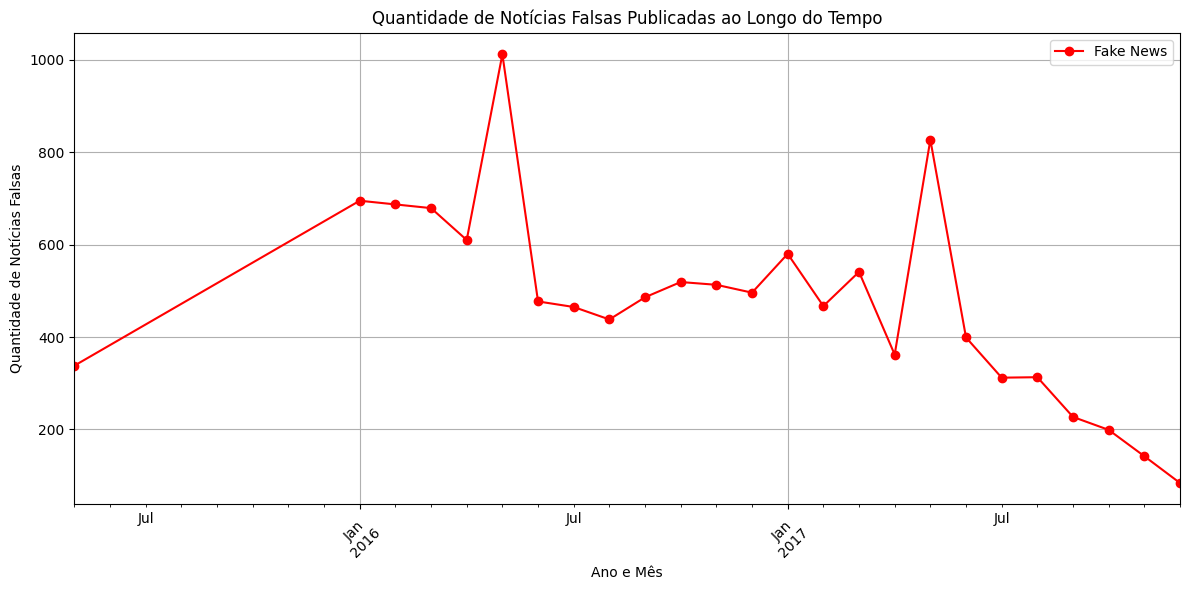

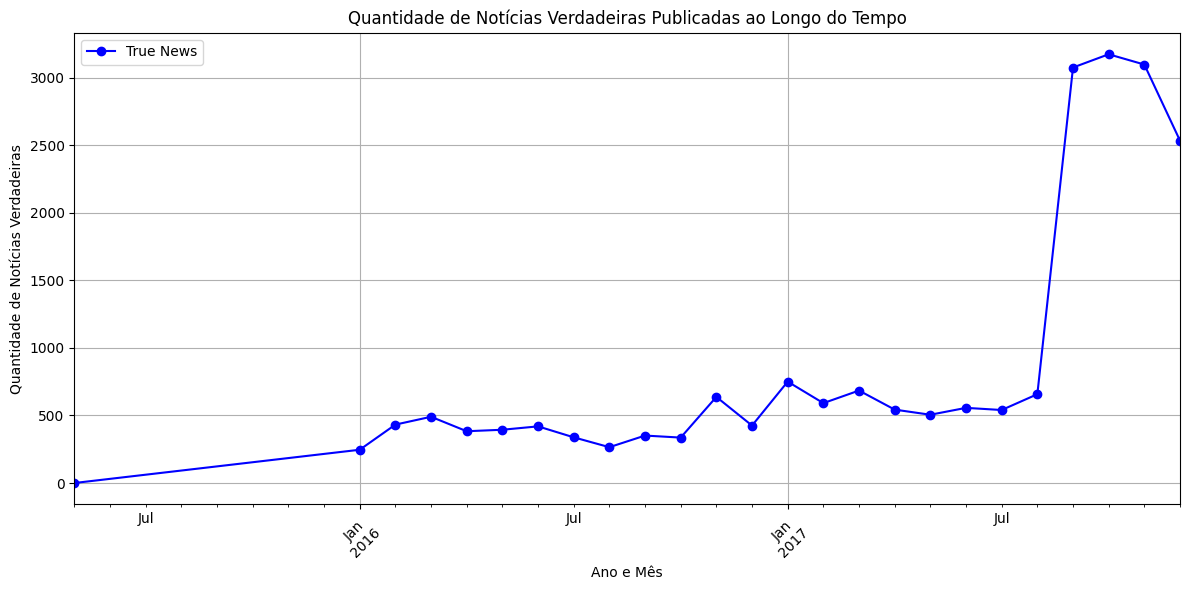

In [122]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar as tabelas
dates = pd.read_csv('dates.csv')
labels = pd.read_csv('labels.csv')

# Mesclar as tabelas 'dates' e 'labels' com base no 'id'
data = pd.merge(dates, labels, on='id', how='inner')

# Verificar os valores únicos na coluna 'label'
print("Valores únicos na coluna 'label':", data['label'].unique())

# Converter a coluna 'date' para formato datetime
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Remover linhas com datas inválidas
data = data.dropna(subset=['date'])

# Extrair o ano e mês da data
data['year_month'] = data['date'].dt.to_period('M')

# Contar o número de notícias por tipo e por período
count_data = data.groupby(['year_month', 'label']).size().unstack(fill_value=0)

# Plotar a quantidade de notícias falsas ao longo do tempo
plt.figure(figsize=(12, 6))
if 'Fake' in count_data.columns:
    count_data['Fake'].plot(kind='line', marker='o', color='red', label='Fake News')
    plt.title('Quantidade de Notícias Falsas Publicadas ao Longo do Tempo')
    plt.xlabel('Ano e Mês')
    plt.ylabel('Quantidade de Notícias Falsas')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("A coluna 'Fake' não foi encontrada em count_data.")

# Plotar a quantidade de notícias verdadeiras ao longo do tempo
plt.figure(figsize=(12, 6))
if 'True' in count_data.columns:
    count_data['True'].plot(kind='line', marker='o', color='blue', label='True News')
    plt.title('Quantidade de Notícias Verdadeiras Publicadas ao Longo do Tempo')
    plt.xlabel('Ano e Mês')
    plt.ylabel('Quantidade de Notícias Verdadeiras')
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("A coluna 'True' não foi encontrada em count_data.")


### Análise de Comprimento de Texto

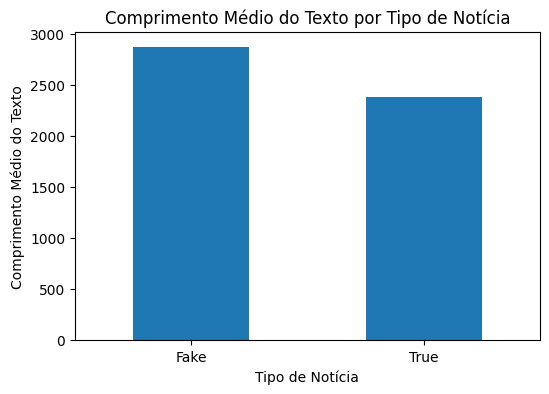

In [123]:
articles = pd.read_csv('articles.csv')
labels = pd.read_csv('labels.csv')

# Mesclar as tabelas 'articles' e 'labels'
data = pd.merge(articles, labels, on='id')

# Calcular o comprimento do texto
data['text_length'] = data['text'].str.len()

# Calcular o comprimento médio do texto por tipo de notícia
avg_text_length = data.groupby('label')['text_length'].mean()

# Criar o gráfico de barras
avg_text_length.plot(kind='bar', figsize=(6, 4))
plt.title('Comprimento Médio do Texto por Tipo de Notícia')
plt.xlabel('Tipo de Notícia')
plt.ylabel('Comprimento Médio do Texto')
plt.xticks(rotation=0)
plt.show()

### Correlação Entre Assunto e Comprimento do Texto

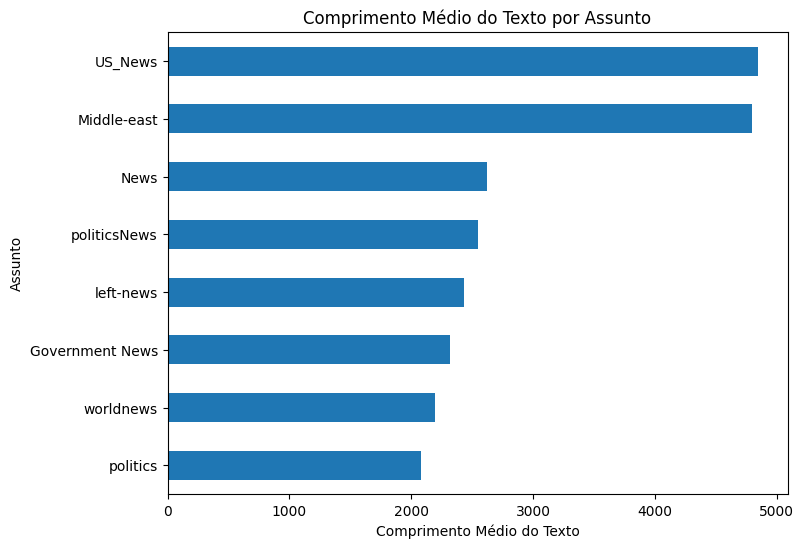

In [124]:
# Mesclar 'articles', 'subjects', e 'labels'
subjects = pd.read_csv('subjects.csv')
articles = pd.read_csv('articles.csv')
labels = pd.read_csv('labels.csv')

data = pd.merge(articles, subjects, on='id')
data = pd.merge(data, labels, on='id')

# Calcular o comprimento do texto
data['text_length'] = data['text'].str.len()

# Calcular o comprimento médio do texto por assunto
subject_text_length = data.groupby('subject')['text_length'].mean()

# Criar o gráfico de barras horizontais
subject_text_length.sort_values().plot(kind='barh', figsize=(8, 6))
plt.title('Comprimento Médio do Texto por Assunto')
plt.xlabel('Comprimento Médio do Texto')
plt.ylabel('Assunto')
plt.show()

### Proporção de Notícias Falsas e Verdadeiras

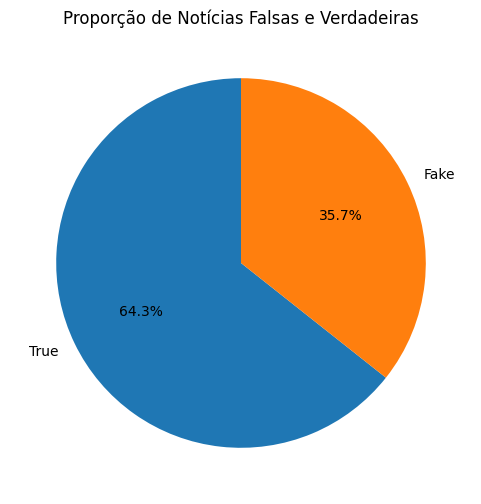

In [125]:
# Contar o número de notícias por tipo
label_counts = labels['label'].value_counts()

# Criar o gráfico de pizza
label_counts.plot(kind='pie', autopct='%1.1f%%', figsize=(6, 6), startangle=90)
plt.title('Proporção de Notícias Falsas e Verdadeiras')
plt.ylabel('')  # Remove o label do eixo Y
plt.show()

### Matriz de correlação

Resultado Esperado
A matriz de correlação mostrará:

- label_numeric vs. Assuntos: Verifica quais assuntos estão mais relacionados a Fake News ou True News.

  - Correlação positiva: O assunto é mais frequente em True News.
  - Correlação negativa: O assunto é mais frequente em Fake News.
- Assunto vs. Assunto: Mostra a relação entre diferentes assuntos.

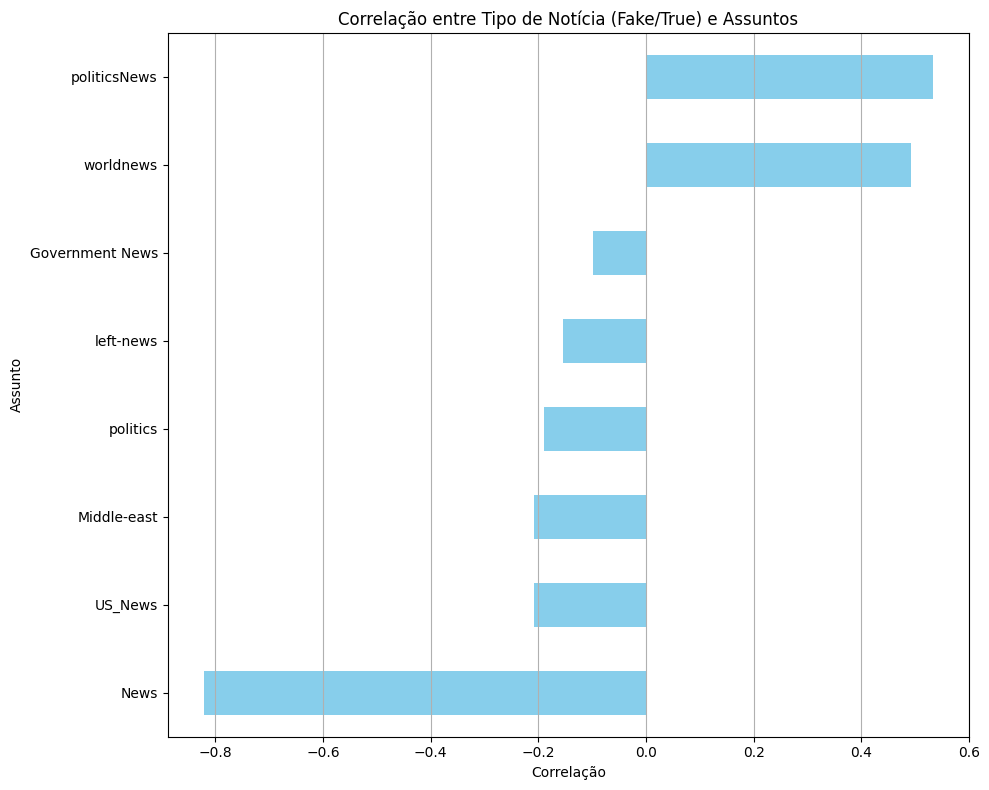

In [126]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregar as tabelas
labels = pd.read_csv('labels.csv')
subjects = pd.read_csv('subjects.csv')

# Mesclar as tabelas 'labels' e 'subjects' com base no 'id'
data = pd.merge(labels, subjects, on='id')

# Codificar o tipo de notícia como 0 (Fake) e 1 (True)
data['label_numeric'] = data['label'].map({'Fake': 0, 'True': 1})

# Aplicar One-Hot Encoding nos assuntos
subjects_encoded = pd.get_dummies(data['subject'])

# Combinar os dados de tipo de notícia com os assuntos
correlation_data = pd.concat([data[['label_numeric']], subjects_encoded], axis=1)

# Calcular a correlação apenas entre 'label_numeric' e os assuntos
correlation_with_label = correlation_data.corr()['label_numeric'].drop('label_numeric')

# Plotar a correlação
plt.figure(figsize=(10, 8))
correlation_with_label.sort_values().plot(kind='barh', color='skyblue')
plt.title('Correlação entre Tipo de Notícia (Fake/True) e Assuntos')
plt.xlabel('Correlação')
plt.ylabel('Assunto')
plt.grid(axis='x')
plt.tight_layout()
plt.show()


## Análise das palavras nos assuntos

### Palavras mais frequentes

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Denil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


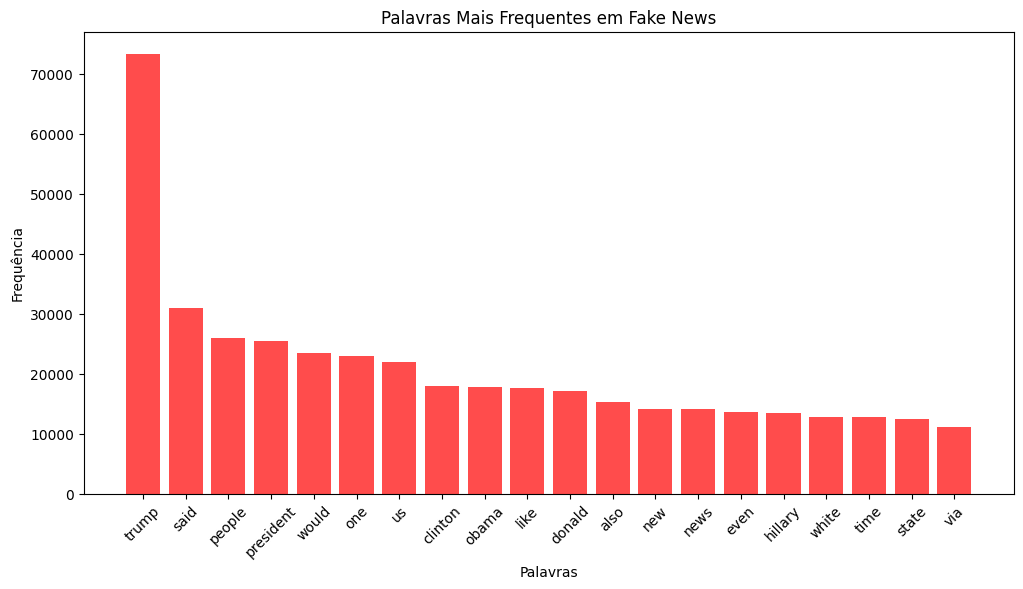

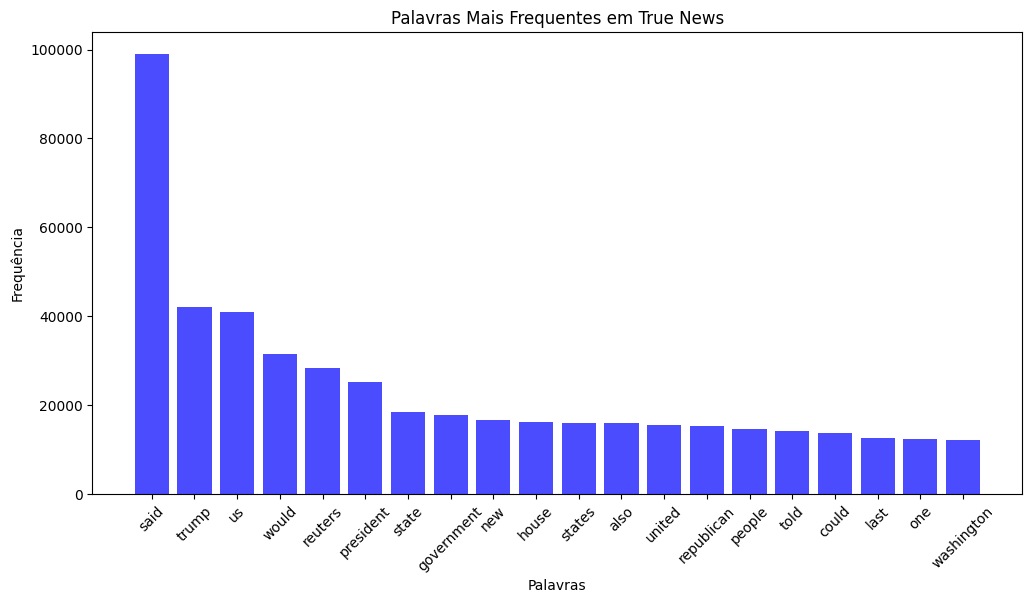

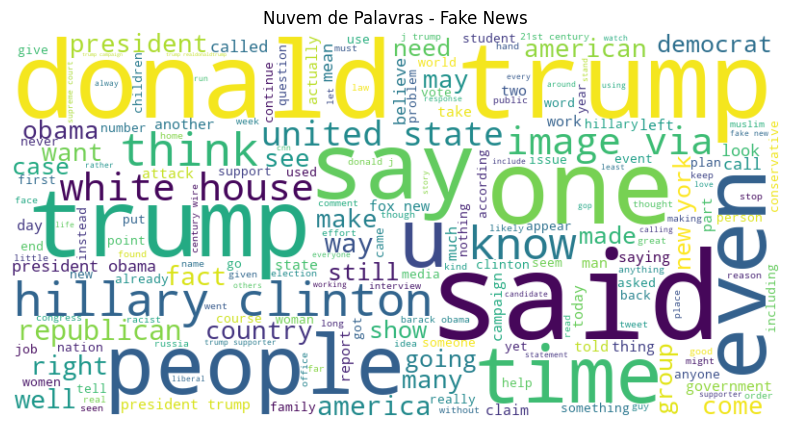

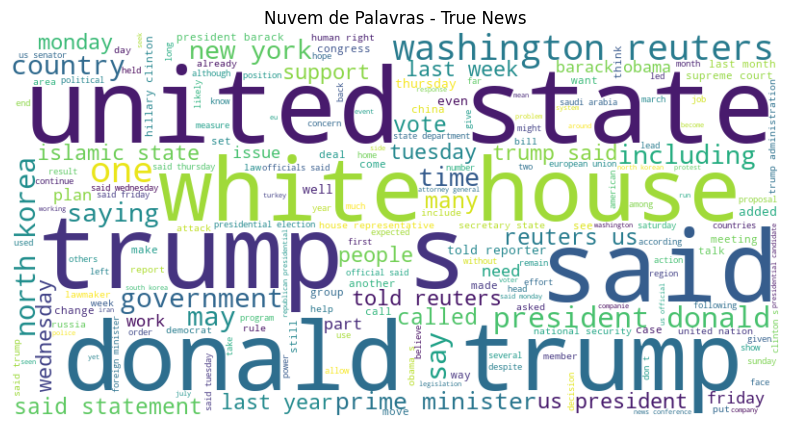

In [129]:
import pandas as pd
import string
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import nltk

# Baixar stopwords (se necessário)
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Carregar os dados
df_fake = pd.read_csv("Fake.csv")
df_true = pd.read_csv("True.csv")

# Limpar e normalizar o texto
def clean_text(text):
    text = text.lower()  # Converter para minúsculas
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remover pontuação
    text = ' '.join(word for word in text.split() if word not in stop_words)  # Remover stopwords
    return text

df_fake['clean_text'] = df_fake['text'].apply(clean_text)
df_true['clean_text'] = df_true['text'].apply(clean_text)

# Contar palavras mais frequentes
def get_top_words(text_series, n=20):
    all_words = ' '.join(text_series).split()  # Unir todos os textos e dividir em palavras
    word_counts = Counter(all_words)  # Contar a frequência das palavras
    return word_counts.most_common(n)

fake_top_words = get_top_words(df_fake['clean_text'])
true_top_words = get_top_words(df_true['clean_text'])

# Criar DataFrames para visualização
fake_df = pd.DataFrame(fake_top_words, columns=['Word', 'Frequency'])
true_df = pd.DataFrame(true_top_words, columns=['Word', 'Frequency'])

# Plotar as palavras mais frequentes
plt.figure(figsize=(12, 6))
plt.bar(fake_df['Word'], fake_df['Frequency'], color='red', alpha=0.7)
plt.title('Palavras Mais Frequentes em Fake News')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

plt.figure(figsize=(12, 6))
plt.bar(true_df['Word'], true_df['Frequency'], color='blue', alpha=0.7)
plt.title('Palavras Mais Frequentes em True News')
plt.xlabel('Palavras')
plt.ylabel('Frequência')
plt.xticks(rotation=45)
plt.show()

# Gerar Nuvens de Palavras
fake_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_fake['clean_text']))
true_wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df_true['clean_text']))

# Mostrar nuvens de palavras
plt.figure(figsize=(10, 5))
plt.imshow(fake_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - Fake News')
plt.show()

plt.figure(figsize=(10, 5))
plt.imshow(true_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nuvem de Palavras - True News')
plt.show()


### Análise de Sentimento

Estimar se as Fake News e True News possuem uma linguagem predominantemente positiva, negativa ou neutra.

Fake News - Sentimento médio: 0.04652602108884817
True News - Sentimento médio: 0.04319167668024758


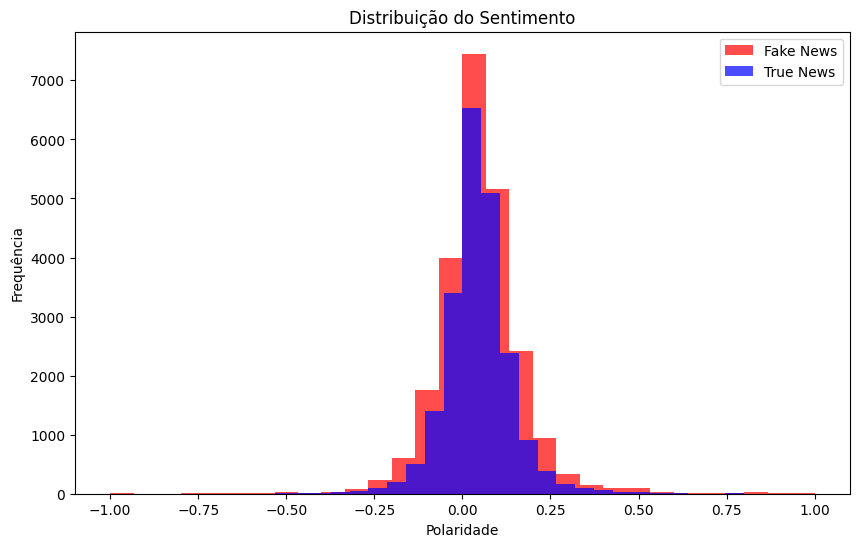

In [132]:
from textblob import TextBlob

# Calcular o sentimento (polarity) para Fake News
df_fake['sentiment'] = df_fake['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Calcular o sentimento (polarity) para True News
df_true['sentiment'] = df_true['clean_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

# Resumo do sentimento
print("Fake News - Sentimento médio:", df_fake['sentiment'].mean())
print("True News - Sentimento médio:", df_true['sentiment'].mean())

# Visualizar a distribuição dos sentimentos
plt.figure(figsize=(10, 6))
plt.hist(df_fake['sentiment'], bins=30, alpha=0.7, label='Fake News', color='red')
plt.hist(df_true['sentiment'], bins=30, alpha=0.7, label='True News', color='blue')
plt.title('Distribuição do Sentimento')
plt.xlabel('Polaridade')
plt.ylabel('Frequência')
plt.legend()
plt.show()

###  Comparação de Palavras Exclusivas
Identificar palavras que aparecem apenas em Fake News ou apenas em True News.

In [133]:
# Obter conjuntos de palavras únicas para Fake e True News
fake_words = set(' '.join(df_fake['clean_text']).split())
true_words = set(' '.join(df_true['clean_text']).split())

# Palavras exclusivas de Fake News
exclusive_fake = fake_words - true_words
print("Palavras exclusivas de Fake News:", list(exclusive_fake)[:20])

# Palavras exclusivas de True News
exclusive_true = true_words - fake_words
print("Palavras exclusivas de True News:", list(exclusive_true)[:20])

Palavras exclusivas de Fake News: ['scandalimagine', 'aliberallady', 'markedoff', 'waterall', 'pictwittercomgn1yra2drg', 'pointsand', 'groupsread', 'individualsthe', 'madasanim', 'gagtwo', 'agreehttpswwwyoutubecomwatchvfct7iofonunewt', 'beholding', 'slayer', 'presentasked', 'traipsing', 'raceevan', 'matteredshe', 'elsewherepolice', 'jeffersondemocrat', 'atlmarch']
Palavras exclusivas de True News: ['rghts”', 'devos”', 'accountablenl1n1fk1vd', 'suggested”', '“purposeful', '0816', '‘political', 'islamabadbased', 'continuation”', '1541', 'dues”', 'indra', 'lila’s', 'hamdaniya', 'disintegrate', 'sanders’”', 'yam', 'saltillo', 'nathon', 'oppositioncontrolled']


### Frequência Relativa de Palavras
Comparar a frequência relativa das palavras entre Fake News e True News.

In [135]:
# Contar palavras em Fake News
fake_word_counts = Counter(' '.join(df_fake['clean_text']).split())

# Contar palavras em True News
true_word_counts = Counter(' '.join(df_true['clean_text']).split())

# Criar um DataFrame para comparação
word_comparison = pd.DataFrame({
    'Fake Frequency': fake_word_counts,
    'True Frequency': true_word_counts
}).fillna(0)

# Ordenar por frequência total
word_comparison['Total Frequency'] = word_comparison['Fake Frequency'] + word_comparison['True Frequency']
word_comparison = word_comparison.sort_values('Total Frequency', ascending=False)

# Exibir as 10 palavras mais comuns
print(word_comparison.head(10))

           Fake Frequency  True Frequency  Total Frequency
said              31008.0         99017.0         130025.0
trump             73422.0         42061.0         115483.0
us                22005.0         40847.0          62852.0
would             23420.0         31418.0          54838.0
president         25495.0         25223.0          50718.0
people            25941.0         14604.0          40545.0
one               22865.0         12295.0          35160.0
also              15221.0         15935.0          31156.0
state             12494.0         18547.0          31041.0
new               14135.0         16712.0          30847.0


###  Comprimento do Texto
Comparar o comprimento médio dos textos entre Fake News e True News.

Fake News - Comprimento médio do texto: 2547.396235254035
True News - Comprimento médio do texto: 2383.278517065882


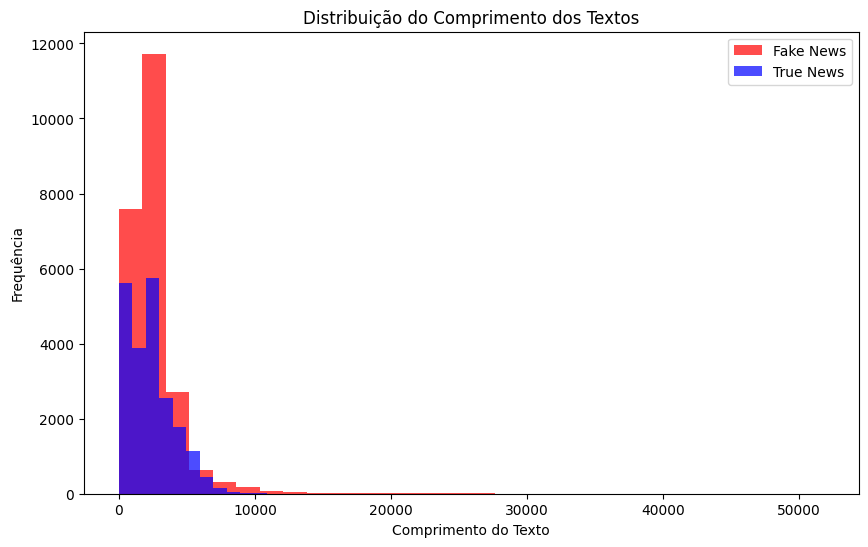

In [136]:
# Calcular o comprimento dos textos
df_fake['text_length'] = df_fake['text'].apply(len)
df_true['text_length'] = df_true['text'].apply(len)

# Resumo estatístico
print("Fake News - Comprimento médio do texto:", df_fake['text_length'].mean())
print("True News - Comprimento médio do texto:", df_true['text_length'].mean())

# Visualizar a distribuição do comprimento dos textos
plt.figure(figsize=(10, 6))
plt.hist(df_fake['text_length'], bins=30, alpha=0.7, label='Fake News', color='red')
plt.hist(df_true['text_length'], bins=30, alpha=0.7, label='True News', color='blue')
plt.title('Distribuição do Comprimento dos Textos')
plt.xlabel('Comprimento do Texto')
plt.ylabel('Frequência')
plt.legend()
plt.show()


### Análise de N-Gramas
Examinar combinações de palavras (bigramas, trigramas) mais frequentes em Fake News e True News.

In [137]:
from sklearn.feature_extraction.text import CountVectorizer

# Função para encontrar os n-gramas mais frequentes
def get_top_ngrams(text_series, ngram_range=(2, 2), n=10):
    vectorizer = CountVectorizer(ngram_range=ngram_range, stop_words='english')
    ngrams = vectorizer.fit_transform(text_series)
    ngram_counts = ngrams.sum(axis=0)
    ngram_freq = [(word, ngram_counts[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    return sorted(ngram_freq, key=lambda x: x[1], reverse=True)[:n]

# Bigrams mais frequentes em Fake News
fake_bigrams = get_top_ngrams(df_fake['clean_text'], ngram_range=(2, 2))
print("Bigrams mais frequentes em Fake News:", fake_bigrams)

# Bigrams mais frequentes em True News
true_bigrams = get_top_ngrams(df_true['clean_text'], ngram_range=(2, 2))
print("Bigrams mais frequentes em True News:", true_bigrams)


Bigrams mais frequentes em Fake News: [('donald trump', np.int64(15191)), ('hillary clinton', np.int64(6707)), ('white house', np.int64(6284)), ('united states', np.int64(6168)), ('new york', np.int64(4179)), ('president obama', np.int64(3794)), ('president trump', np.int64(3610)), ('fox news', np.int64(3167)), ('21st century', np.int64(2225)), ('barack obama', np.int64(2215))]
Bigrams mais frequentes em True News: [('united states', np.int64(12189)), ('donald trump', np.int64(10163)), ('white house', np.int64(8394)), ('washington reuters', np.int64(6487)), ('president donald', np.int64(5929)), ('north korea', np.int64(5620)), ('new york', np.int64(4455)), ('prime minister', np.int64(4133)), ('said statement', np.int64(3933)), ('trump said', np.int64(3550))]


### Análise de Diversidade de Vocabulário
Calcular a proporção de palavras únicas em relação ao total de palavras.

In [138]:
def vocabulary_diversity(text_series):
    all_words = ' '.join(text_series).split()
    unique_words = set(all_words)
    return len(unique_words) / len(all_words)

fake_diversity = vocabulary_diversity(df_fake['clean_text'])
true_diversity = vocabulary_diversity(df_true['clean_text'])

print("Diversidade de vocabulário - Fake News:", fake_diversity)
print("Diversidade de vocabulário - True News:", true_diversity)

Diversidade de vocabulário - Fake News: 0.033798185768659075
Diversidade de vocabulário - True News: 0.02023749137564217


### Comparação da Proporção de Palavras Positivas e Negativas
Usar uma lista de palavras positivas e negativas para calcular a proporção de termos com conotação.

In [139]:
from nltk.corpus import opinion_lexicon
nltk.download('opinion_lexicon')

positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

def sentiment_ratio(text_series, positive_words, negative_words):
    all_words = ' '.join(text_series).split()
    positive_count = sum(1 for word in all_words if word in positive_words)
    negative_count = sum(1 for word in all_words if word in negative_words)
    return positive_count / max(negative_count, 1)  # Evitar divisão por zero

fake_sentiment_ratio = sentiment_ratio(df_fake['clean_text'], positive_words, negative_words)
true_sentiment_ratio = sentiment_ratio(df_true['clean_text'], positive_words, negative_words)

print("Proporção de palavras positivas/negativas - Fake News:", fake_sentiment_ratio)
print("Proporção de palavras positivas/negativas - True News:", true_sentiment_ratio)

[nltk_data] Downloading package opinion_lexicon to
[nltk_data]     C:\Users\Denil\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\opinion_lexicon.zip.


Proporção de palavras positivas/negativas - Fake News: 0.9173311918940223
Proporção de palavras positivas/negativas - True News: 0.9304297678807817
